<a href="https://colab.research.google.com/github/Navodya-Pramodi/ResearchProject_MF/blob/Algorithem04/ResearchProjectFinalYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install catboost
from imblearn.over_sampling import SMOTE #This is for SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score
from catboost import CatBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 78 kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_1= pd.read_excel('/content/gdrive/MyDrive/Finalize Final Year Project/KN.xlsx')

df_1['PRODUCT_NAME']=df_1['PRODUCT_NAME'].replace(['MFF'],'Microfinance')
df_2=df_1.loc[df_1['PRODUCT_NAME'] == 'Microfinance']
df_2['LOAN_STEP']=df_2['LOAN_STEP'].astype(object)
df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PRODUCT_CODE,PRODUCT_NAME,CONTRACT_NO,CONTRACT_STATUS,CONTRACT_DATE,LAST_PAYMENT_DATE,RESCHEDULE,DUE_FREQUENCY,RENTAL,NO_OF_RENTALS,...,INCOME,EXPENSE,LOAN_STEP,LOAN STATUS(FLAG),UnEmp_rate,GDP,Infl_rate,Agri_value,R_Populatoin,Population_DEN
0,MF,Microfinance,TRMF000017382,S,08-SEP-2015,06-JUN-2016,NO,W50,1512.01,50,...,50000.0,30000,8,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,139.20
1,MF,Microfinance,NEMF000029271,S,29-MAY-2015,03-MAY-2016,NO,W50,1764.01,50,...,60000.0,24000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,408.80
2,MF,Microfinance,BGMF000029873,S,26-JUN-2015,19-APR-2017,NO,W50,1401.35,75,...,52000.0,39000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,764.70
3,MF,Microfinance,WLMF000007048,S,25-SEP-2015,27-AUG-2016,NO,W50,1764.01,50,...,130000.0,101250,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,79.99
4,MF,Microfinance,MHMF000032099,S,25-AUG-2015,24-MAR-2016,NO,W50,2016.01,50,...,70000.0,35500,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,285.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,MFB,Microfinance,PWMFB000001952,S,01-OCT-2015,26-OCT-2016,NO,MO2,2108.37,24,...,35000.0,20000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,285.00
8149,MFB,Microfinance,HWMFB000001730,S,01-JUN-2015,21-JAN-2017,NO,MO2,2108.37,24,...,70000.0,43000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,119.90
8150,MFB,Microfinance,KAMFB000005189,S,01-APR-2015,02-MAR-2016,NO,MO2,2108.37,24,...,40000.0,12500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20
8151,MFB,Microfinance,KAMFB000005424,S,01-APR-2015,11-MAR-2016,NO,MO2,2108.37,24,...,35000.0,14500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20


In [4]:
df_2.dtypes


PRODUCT_CODE          object
PRODUCT_NAME          object
CONTRACT_NO           object
CONTRACT_STATUS       object
CONTRACT_DATE         object
LAST_PAYMENT_DATE     object
RESCHEDULE            object
DUE_FREQUENCY         object
RENTAL               float64
NO_OF_RENTALS          int64
PAID_RENTALS         float64
ARREARS_AGE          float64
GENDER                object
BRANCH                object
CITY                  object
DISTRICT_NAME         object
PROVINCE_NAME         object
FINANCE_AMOUNT       float64
EFFECTIVE_RATE       float64
AGE                    int64
MARITAL_STATUS        object
INCOME               float64
EXPENSE                int64
LOAN_STEP             object
LOAN STATUS(FLAG)     object
UnEmp_rate           float64
GDP                  float64
Infl_rate            float64
Agri_value           float64
R_Populatoin         float64
Population_DEN       float64
dtype: object

In [6]:
df=df_2.drop(['PRODUCT_NAME','RESCHEDULE','CONTRACT_STATUS','PAID_RENTALS','BRANCH','CITY','PROVINCE_NAME','LAST_PAYMENT_DATE','CONTRACT_NO','CONTRACT_DATE','ARREARS_AGE'], axis=1)
df.isnull().sum()

PRODUCT_CODE          0
DUE_FREQUENCY         0
RENTAL                0
NO_OF_RENTALS         0
GENDER                1
DISTRICT_NAME         0
FINANCE_AMOUNT        0
EFFECTIVE_RATE        0
AGE                   0
MARITAL_STATUS       28
INCOME                0
EXPENSE               0
LOAN_STEP             0
LOAN STATUS(FLAG)     0
UnEmp_rate            0
GDP                   0
Infl_rate             0
Agri_value            0
R_Populatoin          0
Population_DEN        0
dtype: int64

In [7]:
df = df.rename(columns={'LOAN STATUS(FLAG)': 'LOAN_STATUS'})
df

,PRODUCT_CODE,DUE_FREQUENCY,RENTAL,NO_OF_RENTALS,GENDER,DISTRICT_NAME,FINANCE_AMOUNT,EFFECTIVE_RATE,AGE,MARITAL_STATUS,INCOME,EXPENSE,LOAN_STEP,LOAN_STATUS,UnEmp_rate,GDP,Infl_rate,Agri_value,R_Populatoin,Population_DEN
0,MF,W50,1512.01,50,F,TRINCOMALEE,60000.0,47.35,51,M,50000.0,30000,8,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,139.20
1,MF,W50,1764.01,50,F,NUWARA ELIYA,70000.0,47.35,32,M,60000.0,24000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,408.80
2,MF,W50,1401.35,75,F,KALUTARA,75000.0,47.35,70,M,52000.0,39000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,764.70
3,MF,W50,1764.01,50,F,MONERAGALA,70000.0,47.35,37,M,130000.0,101250,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,79.99
4,MF,W50,2016.01,50,F,BADULLA,80000.0,47.35,42,M,70000.0,35500,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,285.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,MFB,MO2,2108.37,24,F,BADULLA,40000.0,47.35,36,M,35000.0,20000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,285.00
8149,MFB,MO2,2108.37,24,F,ANURADHAPURA,40000.0,47.35,29,M,70000.0,43000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,119.90
8150,MFB,MO2,2108.37,24,F,RATNAPURA,40000.0,47.35,61,M,40000.0,12500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20
8151,MFB,MO2,2108.37,24,F,RATNAPURA,40000.0,47.35,28,M,35000.0,14500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20


**Data pre-processing**

Missing value imputation

In [8]:
#Gender [NAN,missings] replace with 'F'( mode )
df["GENDER"].fillna("F",inplace=True) 

#Marital satus [NAN] replace with "M"( mode )
df["MARITAL_STATUS"].fillna("M",inplace=True)

#Marital status "O" also replace with "M"( mode )
df["MARITAL_STATUS"]=df["MARITAL_STATUS"].replace({"O": "M"})

#EFFECTIVE_RATE [NAN/0] replace with (mean)
df['EFFECTIVE_RATE']=df['EFFECTIVE_RATE'].fillna(df['EFFECTIVE_RATE'].mean())
df.columns

Index(['PRODUCT_CODE', 'DUE_FREQUENCY', 'RENTAL', 'NO_OF_RENTALS', 'GENDER',
       'DISTRICT_NAME', 'FINANCE_AMOUNT', 'EFFECTIVE_RATE', 'AGE',
       'MARITAL_STATUS', 'INCOME', 'EXPENSE', 'LOAN_STEP', 'LOAN_STATUS',
       'UnEmp_rate', 'GDP', 'Infl_rate', 'Agri_value', 'R_Populatoin',
       'Population_DEN'],
      dtype='object')

In [9]:
df['DUE_FREQUENCY'].value_counts()

W50    5260
MO2     673
Name: DUE_FREQUENCY, dtype: int64

In [10]:
df['MARITAL_STATUS'].unique()

array(['M', 'W', 'S', 'D', 'U'], dtype=object)

In [11]:
df['LOAN_STATUS'].unique()

array(['NOT DEFAULT', ' DEFAULT'], dtype=object)

**Outlier Detection**

In [12]:
import matplotlib.pyplot as plt

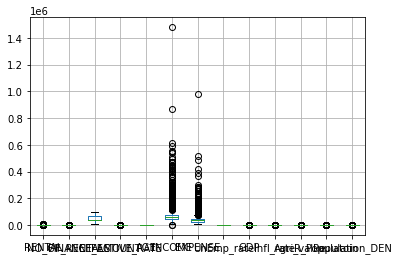

In [13]:
boxplot=df.boxplot(column=["RENTAL",'NO_OF_RENTALS','FINANCE_AMOUNT','EFFECTIVE_RATE','AGE','INCOME','EXPENSE','UnEmp_rate', 'GDP', 'Infl_rate','Agri_value','R_Populatoin','Population_DEN']) 

According to the boxplot, there is some evidence for outliers.

In [14]:
#removing extreme values
df=df[(df['INCOME'] < 400000)] 

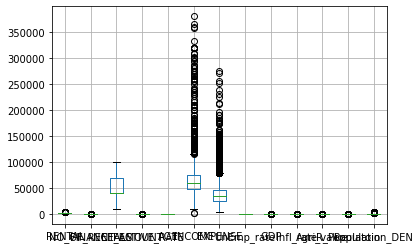

In [15]:
boxplot=df.boxplot(column=["RENTAL","NO_OF_RENTALS","FINANCE_AMOUNT","EFFECTIVE_RATE","AGE","INCOME","EXPENSE",'UnEmp_rate', 'GDP', 'Infl_rate',
       'Agri_value', 'R_Populatoin','Population_DEN']) 

When it comes to the INCOME and EXPENSE, eventhough it shows some extreme points those values can be real. Therefore only the most extreme values were removed to keep the model in a more generalized way.

In [16]:
#Rename last column
df= df.rename(columns={'LOAN STATUS(FLAG)': 'LOAN_STATUS'})

**Categorical** **colunm** **handaling**

In [17]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("feature '{col_name}' has {unique_cat} unique categories".format(
           col_name=col_name, unique_cat=unique_cat))

feature 'PRODUCT_CODE' has 2 unique categories
feature 'DUE_FREQUENCY' has 2 unique categories
feature 'GENDER' has 2 unique categories
feature 'DISTRICT_NAME' has 25 unique categories
feature 'MARITAL_STATUS' has 5 unique categories
feature 'LOAN_STEP' has 8 unique categories
feature 'LOAN_STATUS' has 2 unique categories


In [18]:
df_dum=pd.get_dummies(df[["PRODUCT_CODE",'DUE_FREQUENCY','GENDER','DISTRICT_NAME','MARITAL_STATUS','LOAN_STEP']])
# t=list(df_dum.columns)
# t
df_dum

,PRODUCT_CODE_MF,PRODUCT_CODE_MFB,DUE_FREQUENCY_MO2,DUE_FREQUENCY_W50,GENDER_F,GENDER_M,DISTRICT_NAME_AMPARA,DISTRICT_NAME_ANURADHAPURA,DISTRICT_NAME_BADULLA,DISTRICT_NAME_BATTICALOA,...,MARITAL_STATUS_U,MARITAL_STATUS_W,LOAN_STEP_1,LOAN_STEP_2,LOAN_STEP_3,LOAN_STEP_4,LOAN_STEP_5,LOAN_STEP_6,LOAN_STEP_7,LOAN_STEP_8
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8149,0,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8150,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8151,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
df_dum_new=df_dum.drop(["PRODUCT_CODE_MF",'DUE_FREQUENCY_MO2','GENDER_F','DISTRICT_NAME_ANURADHAPURA','MARITAL_STATUS_D'], axis=1)
df_dum_new

,PRODUCT_CODE_MFB,DUE_FREQUENCY_W50,GENDER_M,DISTRICT_NAME_AMPARA,DISTRICT_NAME_BADULLA,DISTRICT_NAME_BATTICALOA,DISTRICT_NAME_COLOMBO,DISTRICT_NAME_GALLE,DISTRICT_NAME_GAMPAHA,DISTRICT_NAME_HAMBANTHOTA,...,MARITAL_STATUS_U,MARITAL_STATUS_W,LOAN_STEP_1,LOAN_STEP_2,LOAN_STEP_3,LOAN_STEP_4,LOAN_STEP_5,LOAN_STEP_6,LOAN_STEP_7,LOAN_STEP_8
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8149,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8150,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8151,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Drop column from loan step (Last column)
df_dum_new.drop(columns=df_dum_new.columns[-1], 
        axis=1, 
        inplace=True)
df_dum_new.to_csv('out1.csv')

In [21]:
scaler = MinMaxScaler()
df_1= pd.read_csv('out1.csv')
df_2=df.drop(["PRODUCT_CODE",'DUE_FREQUENCY','GENDER','DISTRICT_NAME','MARITAL_STATUS','LOAN_STEP'], axis=1)
df_2.reset_index(drop=True, inplace=True)
std=df_2.drop(df_2.columns[7], axis=1)
col_name=std.columns
std=scaler.fit_transform(std)
std=pd.DataFrame(std)
df_3=pd.concat([std, df_1,df_2['LOAN_STATUS']], axis=1)

for i in range(len(col_name)):
    df_3.rename(columns = {i:col_name[i]}, inplace = True)
df_3.drop(["Unnamed: 0"],axis=1)
df_3

,RENTAL,NO_OF_RENTALS,FINANCE_AMOUNT,EFFECTIVE_RATE,AGE,INCOME,EXPENSE,UnEmp_rate,GDP,Infl_rate,...,MARITAL_STATUS_U,MARITAL_STATUS_W,LOAN_STEP_1,LOAN_STEP_2,LOAN_STEP_3,LOAN_STEP_4,LOAN_STEP_5,LOAN_STEP_6,LOAN_STEP_7,LOAN_STATUS
0,0.323549,0.590164,0.555556,0.965341,0.583333,0.128368,0.096296,0.297872,0.933333,0.000000,...,0,0,0,0,0,0,0,0,0,NOT DEFAULT
1,0.386575,0.590164,0.666667,0.965341,0.187500,0.154781,0.074074,0.297872,0.933333,0.000000,...,0,0,0,0,0,0,0,0,1,NOT DEFAULT
2,0.295873,1.000000,0.722222,0.965341,0.979167,0.133650,0.129630,0.297872,0.933333,0.000000,...,0,0,0,0,0,0,0,0,1,NOT DEFAULT
3,0.386575,0.590164,0.666667,0.965341,0.291667,0.339672,0.360185,0.297872,0.933333,0.000000,...,0,0,0,0,0,0,0,0,1,NOT DEFAULT
4,0.449600,0.590164,0.777778,0.965341,0.395833,0.181194,0.116667,0.297872,0.933333,0.000000,...,0,0,0,0,0,0,0,0,1,NOT DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.472699,0.163934,0.333333,0.965341,0.270833,0.088748,0.059259,1.000000,1.000000,0.130531,...,0,0,1,0,0,0,0,0,0,NOT DEFAULT
5906,0.472699,0.163934,0.333333,0.965341,0.125000,0.181194,0.144444,1.000000,1.000000,0.130531,...,0,0,1,0,0,0,0,0,0,NOT DEFAULT
5907,0.472699,0.163934,0.333333,0.965341,0.791667,0.101955,0.031481,1.000000,1.000000,0.130531,...,0,0,1,0,0,0,0,0,0,NOT DEFAULT
5908,0.472699,0.163934,0.333333,0.965341,0.104167,0.088748,0.038889,1.000000,1.000000,0.130531,...,0,0,1,0,0,0,0,0,0,NOT DEFAULT


In [22]:
#df_3.drop(["Unnamed: 0"],axis=1)
df_4=df_3.drop(['Unnamed: 0'],axis=1)
df_4.dtypes

RENTAL                        float64
NO_OF_RENTALS                 float64
FINANCE_AMOUNT                float64
EFFECTIVE_RATE                float64
AGE                           float64
INCOME                        float64
EXPENSE                       float64
UnEmp_rate                    float64
GDP                           float64
Infl_rate                     float64
Agri_value                    float64
R_Populatoin                  float64
Population_DEN                float64
PRODUCT_CODE_MFB                int64
DUE_FREQUENCY_W50               int64
GENDER_M                        int64
DISTRICT_NAME_AMPARA            int64
DISTRICT_NAME_BADULLA           int64
DISTRICT_NAME_BATTICALOA        int64
DISTRICT_NAME_COLOMBO           int64
DISTRICT_NAME_GALLE             int64
DISTRICT_NAME_GAMPAHA           int64
DISTRICT_NAME_HAMBANTHOTA       int64
DISTRICT_NAME_JAFFNA            int64
DISTRICT_NAME_KALUTARA          int64
DISTRICT_NAME_KANDY             int64
DISTRICT_NAM

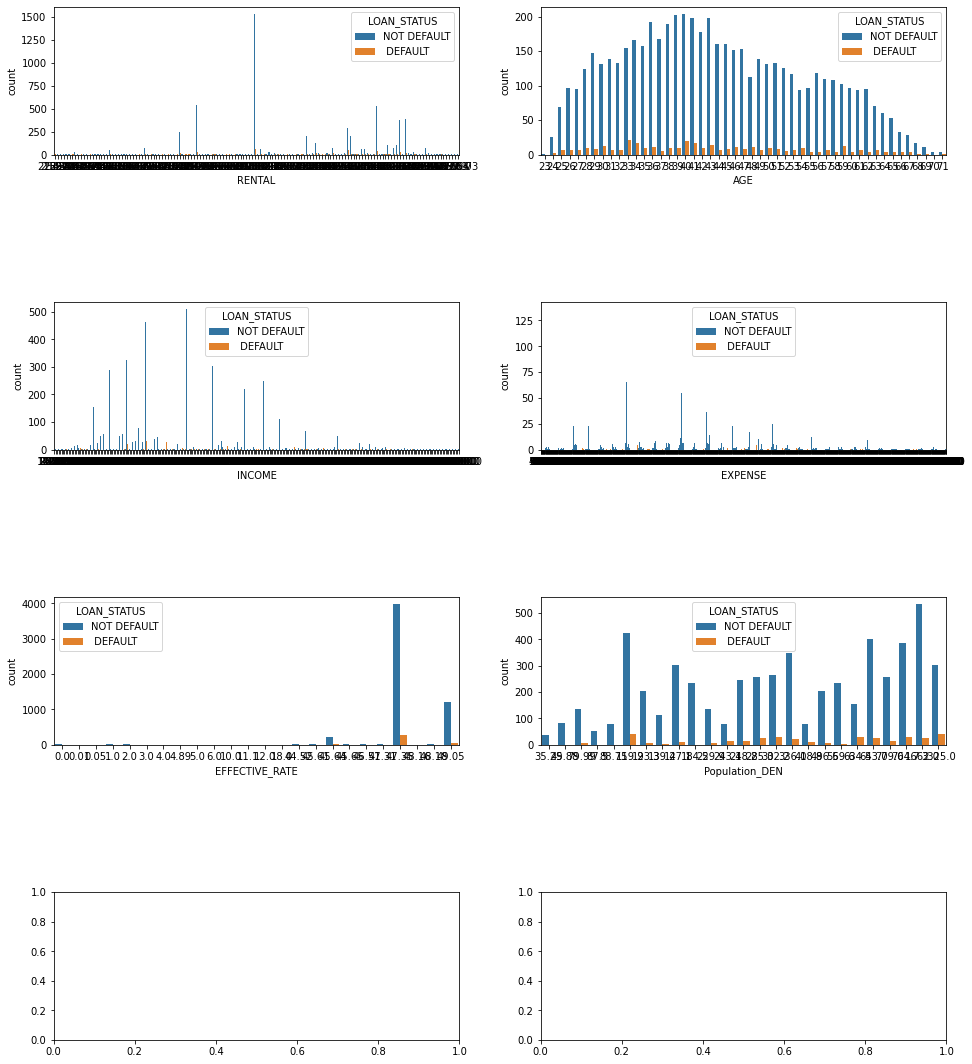

In [23]:
numeric_columns = ['RENTAL','AGE','INCOME','EXPENSE','EFFECTIVE_RATE','Population_DEN']
fig,axes = plt.subplots(4,2,figsize=(16,19))
for idx,cat_col in enumerate(numeric_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_2,hue="LOAN_STATUS",ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Checking for multicollinearity

In [24]:
corr = df_2.corr()
corr.style.background_gradient(cmap ='coolwarm')

,RENTAL,NO_OF_RENTALS,FINANCE_AMOUNT,EFFECTIVE_RATE,AGE,INCOME,EXPENSE,UnEmp_rate,GDP,Infl_rate,Agri_value,R_Populatoin,Population_DEN
RENTAL,1.000000,-0.203251,0.686560,0.023414,0.021866,0.237892,0.188834,-0.288373,-0.147688,-0.209493,-0.159687,0.245126,-0.043443
NO_OF_RENTALS,-0.203251,1.000000,0.537931,-0.013855,0.027298,0.103320,0.091957,-0.352354,-0.176410,-0.255965,-0.177931,0.295005,0.041167
FINANCE_AMOUNT,0.686560,0.537931,1.000000,-0.030104,0.041896,0.312601,0.267016,-0.531014,-0.271364,-0.382526,-0.284118,0.445753,-0.004135
EFFECTIVE_RATE,0.023414,-0.013855,-0.030104,1.000000,0.004238,-0.034414,-0.021580,0.161357,0.097624,0.100426,0.079184,-0.127086,-0.016275
AGE,0.021866,0.027298,0.041896,0.004238,1.000000,-0.008838,0.006362,-0.064954,-0.034204,-0.050581,-0.041181,0.051977,0.060215
INCOME,0.237892,0.103320,0.312601,-0.034414,-0.008838,1.000000,0.827891,-0.164581,-0.074282,-0.125061,-0.078002,0.145938,0.052153
EXPENSE,0.188834,0.091957,0.267016,-0.021580,0.006362,0.827891,1.000000,-0.151672,-0.077436,-0.105827,-0.077796,0.127284,0.091438
UnEmp_rate,-0.288373,-0.352354,-0.531014,0.161357,-0.064954,-0.164581,-0.151672,1.000000,0.557328,0.641990,0.547666,-0.779196,0.002717
GDP,-0.147688,-0.176410,-0.271364,0.097624,-0.034204,-0.074282,-0.077436,0.557328,1.000000,-0.140707,0.644889,-0.025700,0.023534
Infl_rate,-0.209493,-0.255965,-0.382526,0.100426,-0.050581,-0.125061,-0.105827,0.641990,-0.140707,1.000000,0.164587,-0.912460,-0.015112


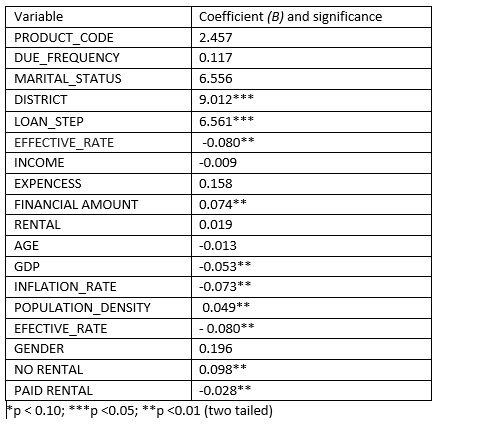

basd on significance values obtained from SPSS tool drop colums do not having significance relationship with Loan status

In [25]:
df_5=df_4.drop(["PRODUCT_CODE_MFB",'DUE_FREQUENCY_W50','GENDER_M','MARITAL_STATUS_W','MARITAL_STATUS_S' ,'MARITAL_STATUS_M','MARITAL_STATUS_U','R_Populatoin','Agri_value','EXPENSE','INCOME','UnEmp_rate','RENTAL'], axis=1)

Checking the balance of the class

In [26]:
df_5['LOAN_STATUS'].value_counts()

NOT DEFAULT    5549
 DEFAULT        361
Name: LOAN_STATUS, dtype: int64

Data set is  imbalance

Splitting the dataset in to x and y


In [27]:
x=df_5.drop(['LOAN_STATUS'], axis=1)
y=df_5['LOAN_STATUS']

**Synthetic Minority Oversampling Technique**

In [28]:
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(x,y)

In [29]:
y_sm.value_counts()

NOT DEFAULT    5549
 DEFAULT       5549
Name: LOAN_STATUS, dtype: int64

**Standaradization and spliting the dataset into train and test**

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

**Logistic regression with ridge penalty**

In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
grid={  
    "C":np.logspace(-3,3,7)
     }
model=LogisticRegression(penalty='l2')

logreg_cv=GridSearchCV(model,grid,cv=5)

logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tuned hpyerparameters :(best parameters)  {'C': 100.0}
accuracy : 0.7000471386879837


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


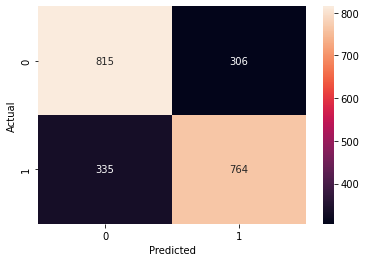

In [32]:
model=LogisticRegression(C=10, penalty='l2')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.71



In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     DEFAULT       0.71      0.73      0.72      1121
 NOT DEFAULT       0.71      0.70      0.70      1099

    accuracy                           0.71      2220
   macro avg       0.71      0.71      0.71      2220
weighted avg       0.71      0.71      0.71      2220



**Logistic regression with lasso penalty**

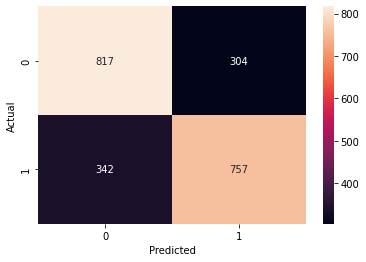

In [35]:
model=LogisticRegression(penalty='l1', solver='liblinear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.71



In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     DEFAULT       0.70      0.73      0.72      1121
 NOT DEFAULT       0.71      0.69      0.70      1099

    accuracy                           0.71      2220
   macro avg       0.71      0.71      0.71      2220
weighted avg       0.71      0.71      0.71      2220



**CatBoostClassifier**

In [ ]:
from catboost import CatBoostClassifier

parameters = {
                 'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                 'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
               }

clf = CatBoostClassifier()
Grid_CBC = GridSearchCV(estimator=clf,param_grid = parameters, cv = 5,n_jobs=-1) 

Grid_CBC.fit(x_train, y_train)

0:	learn: 0.6652320	total: 74.1ms	remaining: 7.33s
1:	learn: 0.6511871	total: 101ms	remaining: 4.93s
2:	learn: 0.6353241	total: 125ms	remaining: 4.04s
3:	learn: 0.6187341	total: 149ms	remaining: 3.57s
4:	learn: 0.6019983	total: 172ms	remaining: 3.27s
5:	learn: 0.5869291	total: 196ms	remaining: 3.07s
6:	learn: 0.5726119	total: 220ms	remaining: 2.92s
7:	learn: 0.5576485	total: 243ms	remaining: 2.79s
8:	learn: 0.5461215	total: 266ms	remaining: 2.69s
9:	learn: 0.5361480	total: 297ms	remaining: 2.67s
10:	learn: 0.5257340	total: 321ms	remaining: 2.59s
11:	learn: 0.5191471	total: 344ms	remaining: 2.52s
12:	learn: 0.5120380	total: 369ms	remaining: 2.47s
13:	learn: 0.5037692	total: 401ms	remaining: 2.46s
14:	learn: 0.4996649	total: 424ms	remaining: 2.4s
15:	learn: 0.4938343	total: 449ms	remaining: 2.35s
16:	learn: 0.4896791	total: 473ms	remaining: 2.31s
17:	learn: 0.4850944	total: 502ms	remaining: 2.29s
18:	learn: 0.4806092	total: 526ms	remaining: 2.24s
19:	learn: 0.4761166	total: 549ms	remaini

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f2516fea790>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8637075878695597

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.04}


In [ ]:
clf = CatBoostClassifier(depth=10,learning_rate=0.04,iterations= 100)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

0:	learn: 0.6652320	total: 28.6ms	remaining: 2.83s
1:	learn: 0.6511871	total: 54.3ms	remaining: 2.66s
2:	learn: 0.6353241	total: 77.7ms	remaining: 2.51s
3:	learn: 0.6187341	total: 101ms	remaining: 2.42s
4:	learn: 0.6019983	total: 124ms	remaining: 2.36s
5:	learn: 0.5869291	total: 147ms	remaining: 2.3s
6:	learn: 0.5726119	total: 174ms	remaining: 2.31s
7:	learn: 0.5576485	total: 202ms	remaining: 2.32s
8:	learn: 0.5461215	total: 229ms	remaining: 2.32s
9:	learn: 0.5361480	total: 253ms	remaining: 2.28s
10:	learn: 0.5257340	total: 277ms	remaining: 2.24s
11:	learn: 0.5191471	total: 300ms	remaining: 2.2s
12:	learn: 0.5120380	total: 323ms	remaining: 2.16s
13:	learn: 0.5037692	total: 349ms	remaining: 2.14s
14:	learn: 0.4996649	total: 378ms	remaining: 2.14s
15:	learn: 0.4938343	total: 403ms	remaining: 2.12s
16:	learn: 0.4896791	total: 429ms	remaining: 2.09s
17:	learn: 0.4850944	total: 453ms	remaining: 2.06s
18:	learn: 0.4806092	total: 482ms	remaining: 2.06s
19:	learn: 0.4761166	total: 510ms	remain

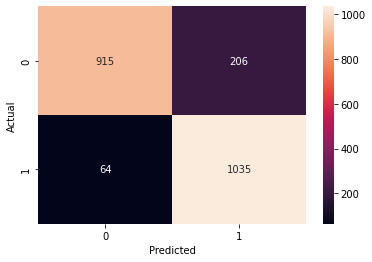

In [ ]:
y_pred=Grid_CBC.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     DEFAULT       0.93      0.82      0.87      1121
 NOT DEFAULT       0.83      0.94      0.88      1099

    accuracy                           0.88      2220
   macro avg       0.88      0.88      0.88      2220
weighted avg       0.88      0.88      0.88      2220



In [ ]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.88



**XGBoost Classifier**

In [ ]:
lr_list=[0.01,0.02,0.03,0.04]
parameters = {'max_depth': [4,5,6,7,8,9, 10],
              'learning_rate' : lr_list , 
              'n_estimators': [10, 20,30,40,50,60,70,80,90, 100]
              }
xgb_clf = XGBClassifier()
Grid_xg = GridSearchCV(estimator=xgb_clf, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_xg.fit(x_train, y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_xg.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_xg.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_xg.best_params_)

In [ ]:
xgb_clf = XGBClassifier(max_depth=10,learning_rate=0.04,n_estimators=100)
xgb_clf.fit(x_train, y_train)
y_pred=xgb_clf.predict(x_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
y_pred=Grid_xg.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

According to the model comparison, XGBoost Classifier gave the highest accuracy XGBoost Classifier will use for the inference part

In [ ]:
#Saving the final model
pickle_out=open("classifier.pkl",'wb')
pickle.dump(xgb_clf, pickle_out)
pickle_out.close()

In [ ]:
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf.fit(x_train, y_train)
xgb_clf.save_model('model.json')